# Titanic Dataset Onboarding
This notebook provides an introduction to the Titanic dataset. The dataset contains information about passengers aboard the Titanic, including their survival status, age, class, and other attributes. We will explore and analyze this dataset.

In [137]:
# Load Required Libraries
import pandas as pd             # basic data manipulation built on NumPy
import numpy as np              # numerical operations 
import seaborn as sns           # statistical data visualization built on Matplotlib
import matplotlib.pyplot as plt # plotting library for Python
import sklearn as sk            # machine learning library for Python

In [138]:
dataset = sns.load_dataset("titanic") # Load the Titanic Dataset 
dataset.head() # Preview the Dataset


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Description of the Titanic Dataset

- **survived**: Indicates whether the passenger survived (1) or not (0).
- **pclass**: Passenger class (1st, 2nd, or 3rd class).
- **sex**: Gender of the passenger (`male` or `female`).
- **age**: Age of the passenger in years (may include decimals for children).
- **sibsp**: Number of siblings or spouses aboard the Titanic.
- **parch**: Number of parents or children aboard the Titanic.
- **fare**: Ticket fare paid by the passenger.
- **embarked**: Port where the passenger boarded the ship (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton).
- **class**: Passenger class as a string (`First`, `Second`, or `Third`). Equivalent to `pclass`.
- **who**: Type of person (`man`, `woman`, or `child`).
- **adult_male**: Whether the passenger is an adult male (`True` or `False`).
- **deck**: Deck where the passenger’s cabin was located (letters A–G; can be missing).
- **embark_town**: Name of the embarkation town (`Cherbourg`, `Queenstown`, or `Southampton`).
- **alive**: Whether the passenger survived (`yes` or `no`).
- **alone**: Whether the passenger was traveling alone (`True` or `False`).


c:\Users\Mehdi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Mehdi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


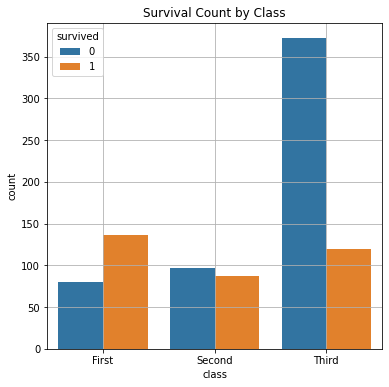

In [139]:
fig, ax = plt.subplots(figsize=(6, 6))                         # Create a figure and axis for plotting
sns.countplot(data=dataset, x='class', hue='survived', ax=ax)   # Create a count plot for 'class' vs 'survived'
ax.set_title('Survival Count by Class')                         # Set the title of the plot
ax.grid(True)                                                   # Add grid lines to the plot

Total Passengers: 891
Total Survivors: 342
Overall Probability of Survival: 0.38


Text(0.5, 1.0, 'Probability of Survival by Class')

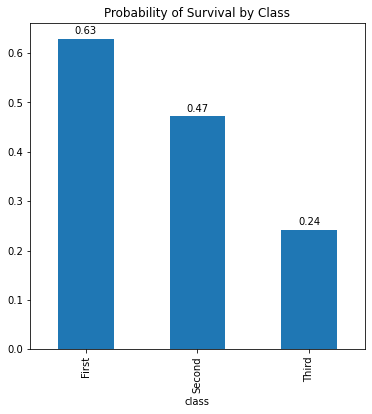

In [140]:
# Calculate Total Passengers and Survivors
total_ppl = dataset.shape[0]  # Total number of passengers
total_survived = dataset['survived'].sum()  # Total number of survivors

# Calculate Survivors by Class
total_survived_by_class = dataset.groupby('class', observed=False)['survived'].sum()  # Total survivors by class

# Calculate Probability of Survival
probability_of_survival = total_survived / total_ppl  # Overall probability of survival
probability_of_survival_by_class = total_survived_by_class / dataset.groupby('class', observed=False).size()  # Probability of survival by class

# Display Results
print(f"Total Passengers: {total_ppl}")
print(f"Total Survivors: {total_survived}")
print(f"Overall Probability of Survival: {probability_of_survival:.2f}")
fig, ax = plt.subplots(figsize=(6, 6))  # Create a new figure and axis for the probability plot
probability_of_survival_by_class.plot(kind='bar', ax=ax)  # Plot the probability of survival by class
for i, v in enumerate(probability_of_survival_by_class):
    ax.text(i, v + 0.005, f"{v:.2f}", ha='center', va='bottom')  # Add text on top of each bar
ax.set_title('Probability of Survival by Class')  # Set the title of the probability plot

The 1st naive model can be used to predict the chance of survival based only on class
We can now calculate the performance of this 1st naive model by comparing the predicted survival probabilities with the actual survival outcomes in the dataset. 
The idea is to calculate randomly if a passenger survived based on the class they were in, using the probabilities we derived earlier.

In [141]:
def monte_carlo_survival_predict(pclass, survival_probs = {'First': 0.63, 'Second': 0.47, 'Third': 0.24}):
    """
    For a given passenger class, draw 1 (survive) with the empirical survival probability.
    """
    prob = survival_probs[pclass]
    return int(np.random.rand() < prob)


In [142]:
#make an iteration to predict survival for each passenger
for index, row in dataset.iterrows():
    dataset.at[index, 'Monte_Carlo_Prediction'] = monte_carlo_survival_predict(row['class'])
#display the first few rows of the dataset to see the predictions
dataset['Monte_Carlo_Prediction'] = dataset['Monte_Carlo_Prediction'].astype(int)  # Ensure predictions are integers
dataset[['class', 'survived', 'Monte_Carlo_Prediction']].head()

,class,survived,Monte_Carlo_Prediction
0,Third,0,0
1,First,1,1
2,Third,1,0
3,First,1,0
4,Third,0,0


Classical way to score the model is to used a confusion matrix, correctly predicted vs incorrectly predicted for each class.

In [152]:
for name, subdf in dataset.groupby('class', observed=False):
    n_passagers = len(subdf)
    n_errors = (subdf["survived"] != subdf["Monte_Carlo_Prediction"]).sum()
    error_rate = n_errors / n_passagers
    print(f"Class {name}: {n_errors} errors out of {n_passagers} ({error_rate:.2%})")
print('total error rate: ', (dataset["survived"] != dataset["Monte_Carlo_Prediction"]).mean())

Class First: 102 errors out of 216 (47.22%)
Class Second: 99 errors out of 184 (53.80%)
Class Third: 180 errors out of 491 (36.66%)
total error rate:  0.4276094276094276


So this is the very first naive model we can build with this dataset, which is based on the class of the passengers.
This model serves as a baseline for further improvements and more complex models that can be developed later.
let's check the other metrics to see if there is a possibility to improve the model.

In [144]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Monte_Carlo_Prediction
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


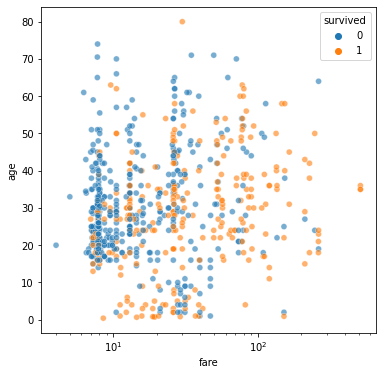

In [145]:
fig, ax = plt.subplots(figsize=(6, 6))  # Create a new figure and axis for the confusion matrix
sns.scatterplot(data=dataset, x='fare', y='age', hue='survived', ax=ax, alpha=0.6)
ax.set_xscale('log')  # Set x-axis to logarithmic scale for better visibility

(0.0, 80.0)

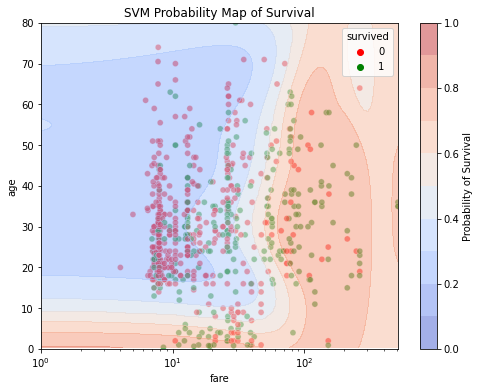

In [146]:
# 1. Prepare data
df = dataset.copy()  # Make a copy of the dataset to avoid modifying the original
# Select relevant features and drop rows with missing values
features = ['fare', 'age', 'survived']
df = df[features].dropna() # Drop rows with NaN values in the selected features

X = df[['fare', 'age']].values
y = df['survived'].values

# 2. Scaling is IMPORTANT for SVM! 
scaler = sk.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train the SVM model (with probability=True for predict_proba)
svm = sk.svm.SVC(probability=True, kernel='rbf', gamma='auto', random_state=0)
svm.fit(X_scaled, y)

# 4. Create a meshgrid (log scale for fare)
fare_min, fare_max = df['fare'].min(), df['fare'].max()
age_min, age_max = df['age'].min(), df['age'].max()
fare_range = np.logspace(np.log10(fare_min + 1e-3), np.log10(fare_max + 1e-3), 200)
age_range = np.linspace(age_min, age_max, 200)
xx, yy = np.meshgrid(fare_range, age_range)
grid_points = np.c_[xx.ravel(), yy.ravel()]
# Scale the grid as well!
grid_points_scaled = scaler.transform(grid_points)

# 5. Predict probabilities on the grid
proba_grid = svm.predict_proba(grid_points_scaled)[:, 1].reshape(xx.shape)

# 6. Plot
fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure and axis for the probability map
sns.scatterplot(data=df, x='fare', y='age', hue='survived', ax=ax, alpha=0.6, palette={0: 'red', 1: 'green'})
contour = ax.contourf(xx, yy, proba_grid, levels=np.linspace(0, 1, 11), cmap='coolwarm', alpha=0.5)
ax.set_xscale('log')  # Set x-axis to logarithmic scale for better visibility
plt.colorbar(contour, ax=ax, label='Probability of Survival')  # Add a color bar to indicate probability levels
ax.set_title('SVM Probability Map of Survival')  # Set the title of the plot
ax.set_xlim(1, fare_max)  # Set x-axis limits
ax.set_ylim(0, age_max)  # Set y-axis limits

the model based on ticket price and age is a bit more complex, but it can be used to predict the chance of survival based on these two features.
the error rate is calculated by comparing the predicted survival outcomes with the actual survival outcomes in the dataset.
here the error rate is only ~ 30% vs 42% for the naive model based on class.

In [150]:
df['SVM prediction'] = svm.predict(X_scaled)  # Add SVM predictions to the DataFrame
df['SVM prediction'] = df['SVM prediction'].astype(int)  # Ensure predictions are integers
df[['fare', 'age', 'survived', 'SVM prediction']].head()
#calulate the error rate / nb of passengers
n_passagers = len(df)
n_errors = (df["survived"] != df["SVM prediction"]).sum()
error_rate = n_errors / n_passagers
print(f"Total Passengers: {n_passagers}")
print(f"Total Errors: {n_errors}")
print(f"Error Rate: {error_rate:.2%}")

Total Passengers: 714
Total Errors: 213
Error Rate: 29.83%
